In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'Expresso_churn_dataset.csv'

# Import the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [2]:
# Display the data types of each column in the DataFrame
print(df.dtypes)


user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


In [3]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
TIGO              59.887988
ZONE1             92.120835
ZONE2             93.648052
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64


In [4]:
df['REGION'].value_counts()


REGION
DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: count, dtype: int64

In [5]:
df['CHURN'].value_counts()

CHURN
0    1750062
1     403986
Name: count, dtype: int64

In [6]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Group by 'REGION' and get the value counts for 'TENURE' for each region
tenure_value_counts = df.groupby('REGION')['TENURE'].value_counts().unstack()

# Print the results
print(tenure_value_counts)


TENURE       D 3-6 month  E 6-9 month  F 9-12 month  G 12-15 month  \
REGION                                                               
DAKAR              165.0        337.0        1743.0         3018.0   
DIOURBEL            12.0         40.0         308.0          334.0   
FATICK               8.0         39.0          59.0          109.0   
KAFFRINE             2.0         10.0          31.0          161.0   
KAOLACK             88.0         70.0         155.0          305.0   
KEDOUGOU             NaN          NaN           4.0            2.0   
KOLDA                5.0         14.0          81.0          205.0   
LOUGA               18.0         58.0         393.0          608.0   
MATAM                7.0         42.0         173.0          251.0   
SAINT-LOUIS         90.0        232.0        1182.0          796.0   
SEDHIOU              3.0          4.0          16.0           21.0   
TAMBACOUNDA          7.0         14.0         115.0          229.0   
THIES               

In [7]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Group by 'REGION' and compute the mode for 'TENURE' for each region
mode_tenure = df.groupby('REGION')['TENURE'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Print the results
print(mode_tenure)


REGION
DAKAR          K > 24 month
DIOURBEL       K > 24 month
FATICK         K > 24 month
KAFFRINE       K > 24 month
KAOLACK        K > 24 month
KEDOUGOU       K > 24 month
KOLDA          K > 24 month
LOUGA          K > 24 month
MATAM          K > 24 month
SAINT-LOUIS    K > 24 month
SEDHIOU        K > 24 month
TAMBACOUNDA    K > 24 month
THIES          K > 24 month
ZIGUINCHOR     K > 24 month
Name: TENURE, dtype: object


In [8]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Drop rows where 'REGION' has missing values
df = df.dropna(subset=['REGION'])

# Print the first few rows of the cleaned DataFrame to verify
df.head()


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\2435622800.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Count', data=region_counts, palette='viridis')


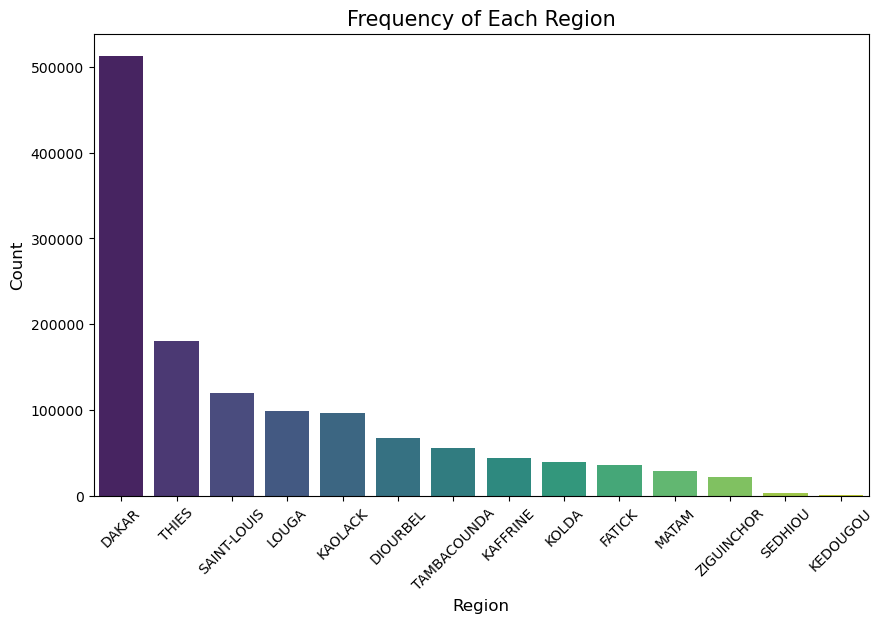

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Get value counts for the 'REGION' column
region_counts = df['REGION'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', data=region_counts, palette='viridis')

# Adding titles and labels
plt.title('Frequency of Each Region', size=15)
plt.xlabel('Region', size=12)
plt.ylabel('Count', size=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [10]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
user_id            0.000000
REGION             0.000000
TENURE             0.000000
MONTANT           16.269030
FREQUENCE_RECH    16.269030
REVENUE           15.086503
ARPU_SEGMENT      15.086503
FREQUENCE         15.086503
DATA_VOLUME       37.841455
ON_NET            18.093365
ORANGE            22.517664
TIGO              45.196969
ZONE1             89.627277
ZONE2             92.122853
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          23.311457
FREQ_TOP_PACK     23.311457
CHURN              0.000000
dtype: float64


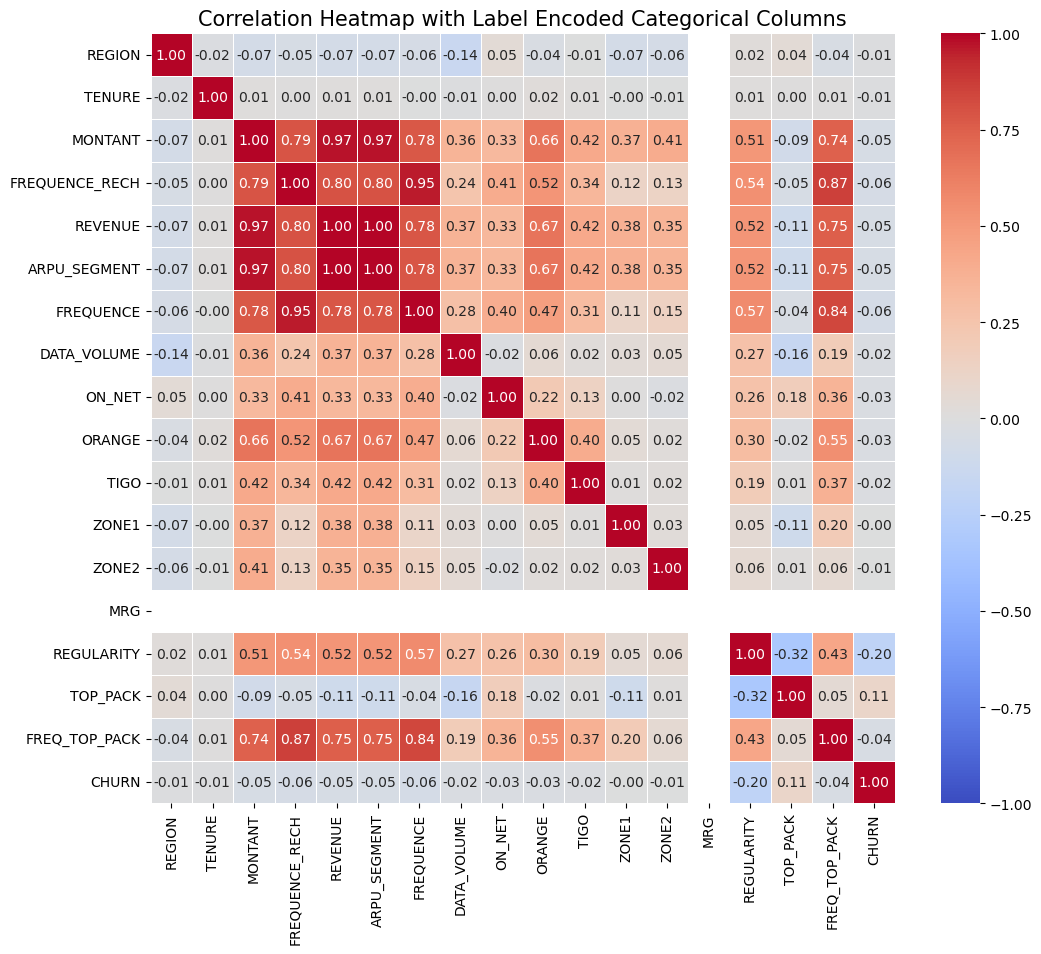

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded the dataset into a DataFrame named df

# Create df3 by copying df
df3 = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
categorical_columns = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']  # Specify categorical columns
for col in categorical_columns:
    df3[col] = label_encoder.fit_transform(df3[col].astype(str))

# Drop the 'user_id' column if it exists
df3 = df3.drop(columns=['user_id'], errors='ignore')

# Select only numeric columns
numeric_df3 = df3.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix_df3 = numeric_df3.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix_df3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap with Label Encoded Categorical Columns', size=15)

# Show the plot
plt.show()


In [12]:
import pandas as pd

# Assuming you have already created df3 and computed the correlation matrix

# Compute the correlation matrix
corr_matrix = df3.corr()

# Find pairs of variables with correlation greater than 0.5
strong_corr = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1.0)]  # Exclude self-correlation

# Extract non-zero correlations
non_zero_corr = strong_corr.stack()

# Display the results
print("Variables with correlation greater than 0.5:")
print(non_zero_corr)


Variables with correlation greater than 0.5:
MONTANT         FREQUENCE_RECH    0.792278
                REVENUE           0.974937
                ARPU_SEGMENT      0.974937
                FREQUENCE         0.775767
                ORANGE            0.664159
                REGULARITY        0.514843
                FREQ_TOP_PACK     0.744643
FREQUENCE_RECH  MONTANT           0.792278
                REVENUE           0.801430
                ARPU_SEGMENT      0.801429
                FREQUENCE         0.954262
                ORANGE            0.516653
                REGULARITY        0.539481
                FREQ_TOP_PACK     0.866383
REVENUE         MONTANT           0.974937
                FREQUENCE_RECH    0.801430
                ARPU_SEGMENT      1.000000
                FREQUENCE         0.783783
                ORANGE            0.666493
                REGULARITY        0.522349
                FREQ_TOP_PACK     0.754927
ARPU_SEGMENT    MONTANT           0.974937
         

In [13]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Group by 'REGION' and calculate the mode and mean of 'MONTANT'
mode_montant = df.groupby('REGION')['MONTANT'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mean_montant = df.groupby('REGION')['MONTANT'].mean()

# Combine results into a single DataFrame
montant_stats = pd.DataFrame({
    'Mode of MONTANT': mode_montant,
    'Mean of MONTANT': mean_montant
})

print(montant_stats)


             Mode of MONTANT  Mean of MONTANT
REGION                                       
DAKAR                  500.0      7301.405194
DIOURBEL               500.0      3848.025153
FATICK                 500.0      4546.160201
KAFFRINE               500.0      4840.727480
KAOLACK                500.0      4906.802192
KEDOUGOU               500.0      5971.245729
KOLDA                  500.0      5315.004042
LOUGA                  500.0      4770.627753
MATAM                  500.0      4923.112982
SAINT-LOUIS            500.0      5964.441774
SEDHIOU                500.0      4670.837257
TAMBACOUNDA            500.0      5701.601239
THIES                  500.0      5860.465985
ZIGUINCHOR             500.0      5417.381169


In [14]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Group by 'REGION' and calculate mode, mean, and Q2 (median) of 'MONTANT'
stats_montant = df.groupby('REGION')['MONTANT'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_montant)


         REGION   Mode         Mean      Q2
0         DAKAR  500.0  7301.405194  4700.0
1      DIOURBEL  500.0  3848.025153  2200.0
2        FATICK  500.0  4546.160201  2500.0
3      KAFFRINE  500.0  4840.727480  2700.0
4       KAOLACK  500.0  4906.802192  2800.0
5      KEDOUGOU  500.0  5971.245729  3300.0
6         KOLDA  500.0  5315.004042  3000.0
7         LOUGA  500.0  4770.627753  2800.0
8         MATAM  500.0  4923.112982  2750.0
9   SAINT-LOUIS  500.0  5964.441774  3800.0
10      SEDHIOU  500.0  4670.837257  2800.0
11  TAMBACOUNDA  500.0  5701.601239  3500.0
12        THIES  500.0  5860.465985  3500.0
13   ZIGUINCHOR  500.0  5417.381169  3000.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\841980714.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


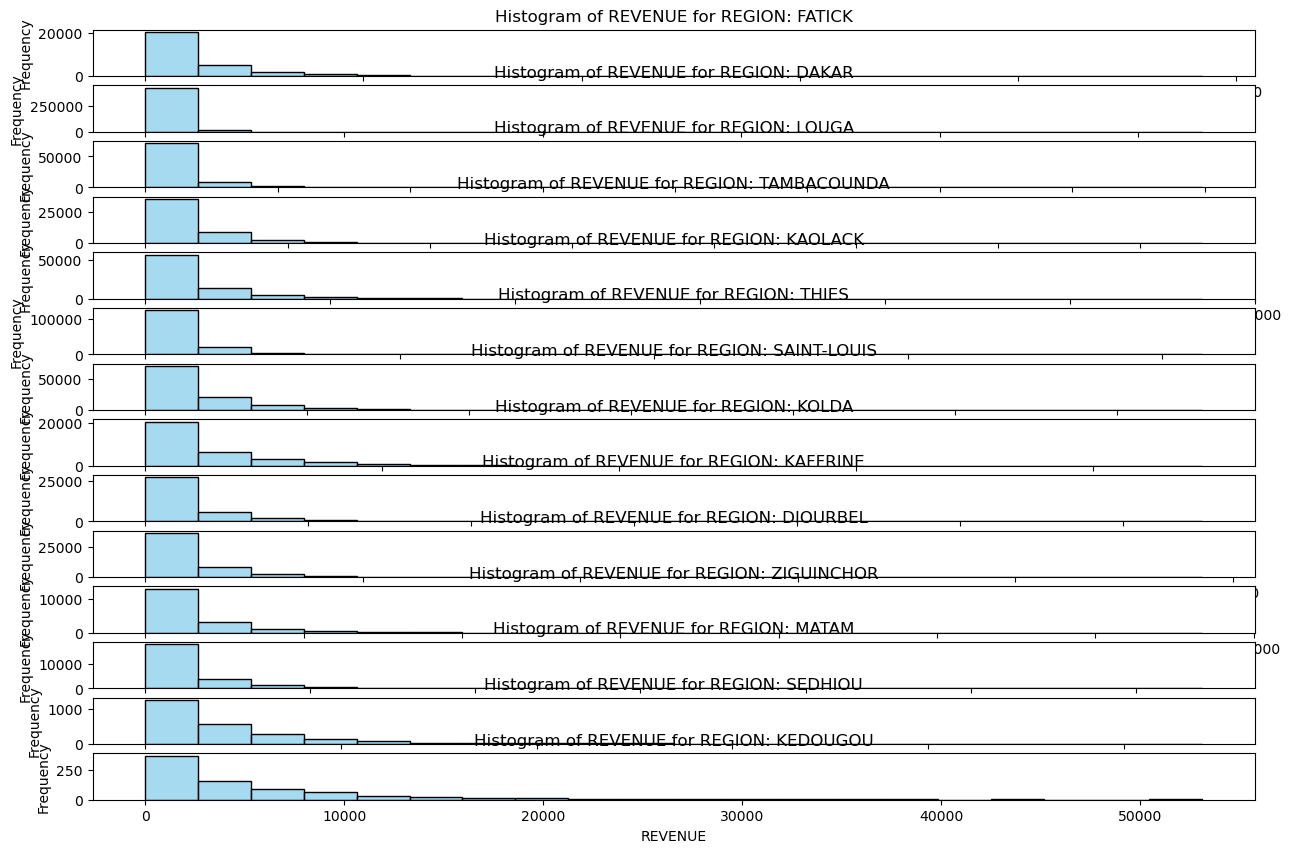

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for 'REVENUE' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['REVENUE'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of REVENUE for REGION: {region}')
    plt.xlabel('REVENUE')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Step 1: Calculate the Q2 (median) for each REGION
q2_values = df.groupby('REGION')['MONTANT'].median()

# Step 2: Replace missing values in MONTANT with the Q2 value of each REGION
def replace_na_with_q2(row):
    if pd.isna(row['MONTANT']):
        return q2_values[row['REGION']]
    return row['MONTANT']

# Apply the function to replace missing values
df['MONTANT'] = df.apply(replace_na_with_q2, axis=1)

# Verify that there are no missing values left in 'MONTANT'
print(df['MONTANT'].isna().sum())


0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\136461106.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


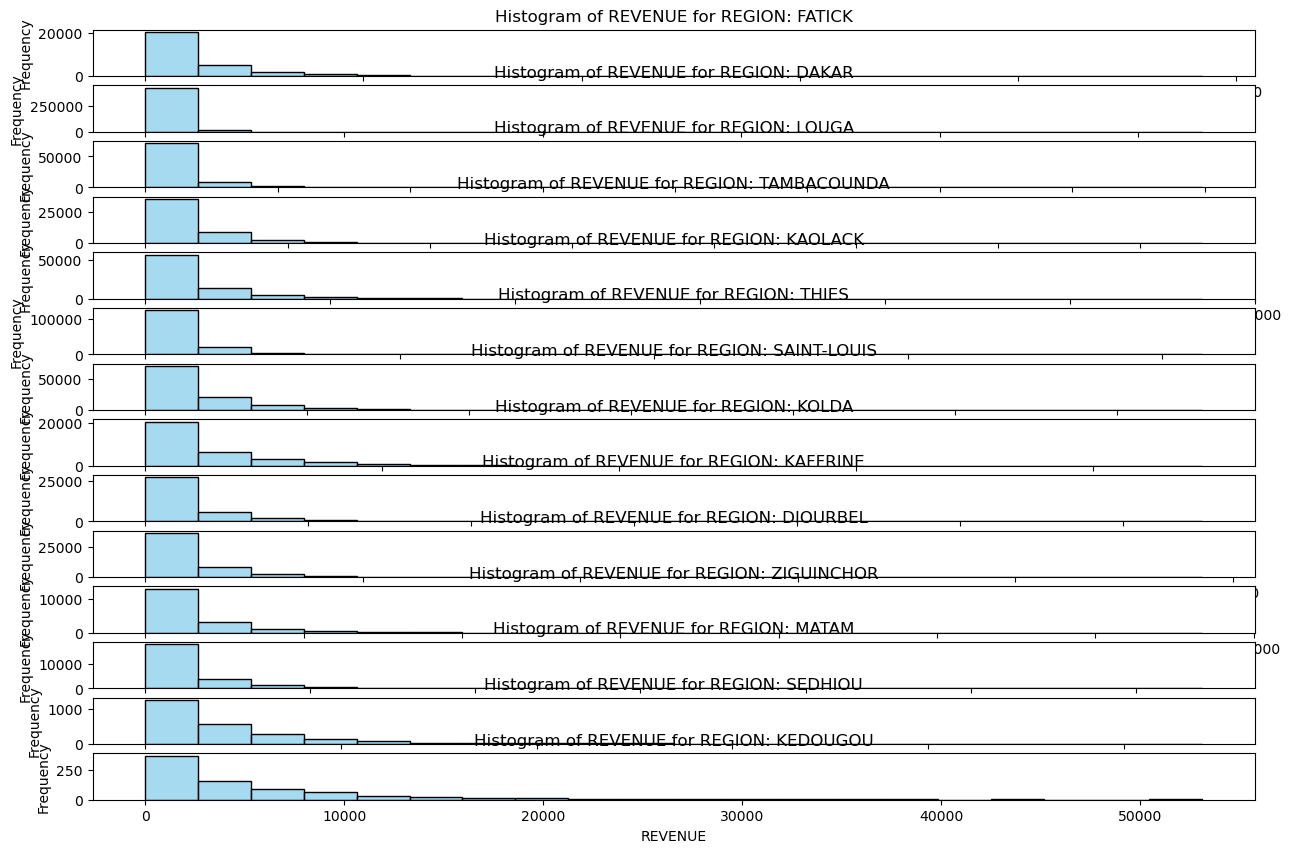

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for 'REVENUE' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['REVENUE'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of REVENUE for REGION: {region}')
    plt.xlabel('REVENUE')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

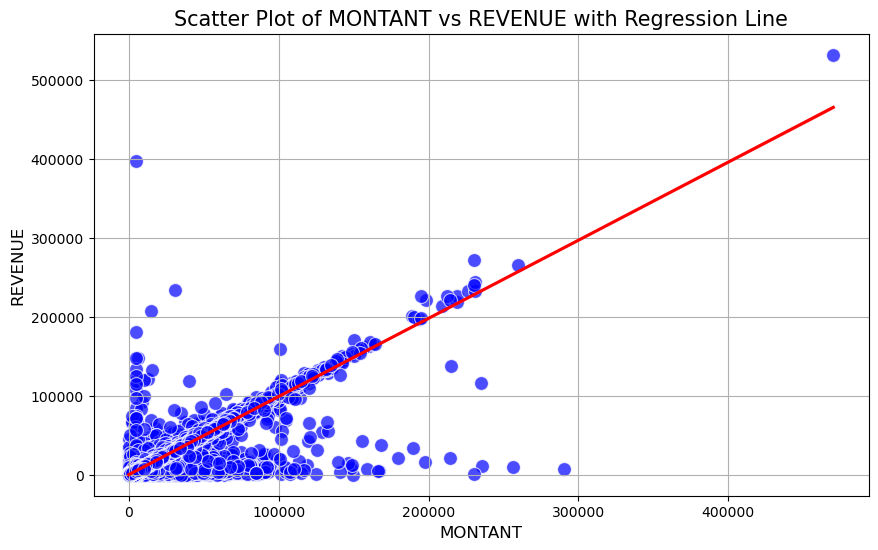

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Scatter plot with a regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MONTANT', y='REVENUE', data=df, color='blue', s=100, alpha=0.7)
sns.regplot(x='MONTANT', y='REVENUE', data=df, scatter=False, color='red')

plt.title('Scatter Plot of MONTANT vs REVENUE with Regression Line', size=15)
plt.xlabel('MONTANT', size=12)
plt.ylabel('REVENUE', size=12)

plt.grid(True)
plt.show()


In [19]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Group by 'REGION' and calculate mode, mean, and Q2 (median) of 'MONTANT'
stats_montant = df.groupby('REGION')['MONTANT'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_montant)


         REGION    Mode         Mean      Q2
0         DAKAR  4700.0  6924.851677  4700.0
1      DIOURBEL  2200.0  3392.663717  2200.0
2        FATICK  2500.0  4167.732795  2500.0
3      KAFFRINE  2700.0  4475.718422  2700.0
4       KAOLACK  2800.0  4522.591993  2800.0
5      KEDOUGOU  3300.0  5292.958824  3300.0
6         KOLDA  3000.0  4981.105206  3000.0
7         LOUGA  2800.0  4415.368449  2800.0
8         MATAM  2750.0  4529.706530  2750.0
9   SAINT-LOUIS  3800.0  5672.993369  3800.0
10      SEDHIOU  2800.0  4252.163193  2800.0
11  TAMBACOUNDA  3500.0  5403.825017  3500.0
12        THIES  3500.0  5465.647857  3500.0
13   ZIGUINCHOR  3000.0  4939.743222  3000.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\4008753706.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


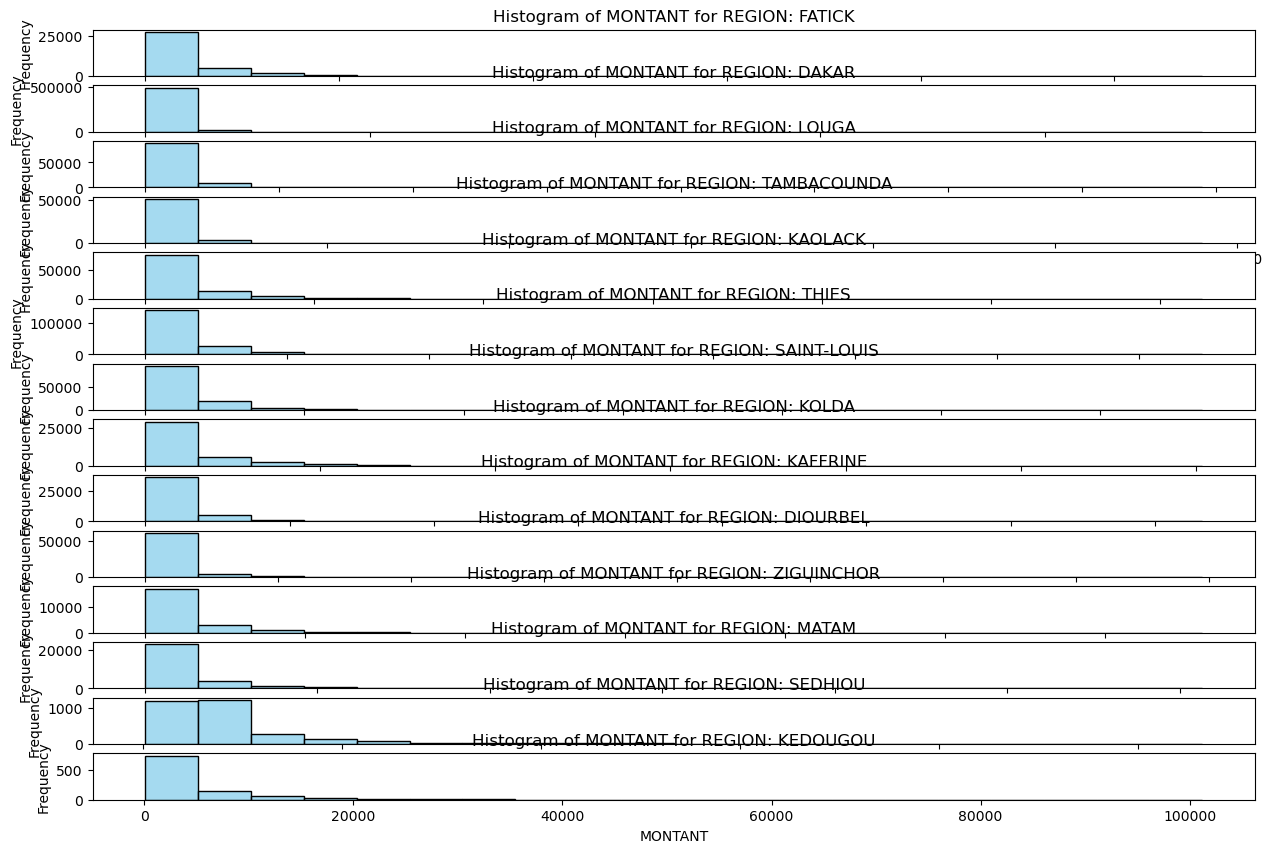

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for 'MONTANT' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['MONTANT'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of MONTANT for REGION: {region}')
    plt.xlabel('MONTANT')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [21]:


import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Step 1: Calculate the Q2 (median) for each REGION
q2_values = df.groupby('REGION')['MONTANT'].median()

# Step 2: Define a function to replace missing values in MONTANT with the Q2 value of each REGION
def replace_na_with_q2(row):
    if pd.isna(row['MONTANT']):
        return q2_values.get(row['REGION'], row['MONTANT'])
    return row['MONTANT']

# Apply the function to replace missing values
df['MONTANT'] = df.apply(replace_na_with_q2, axis=1)

# Verify that there are no missing values left in 'MONTANT'
print(df['MONTANT'].isna().sum())


0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\1471328839.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


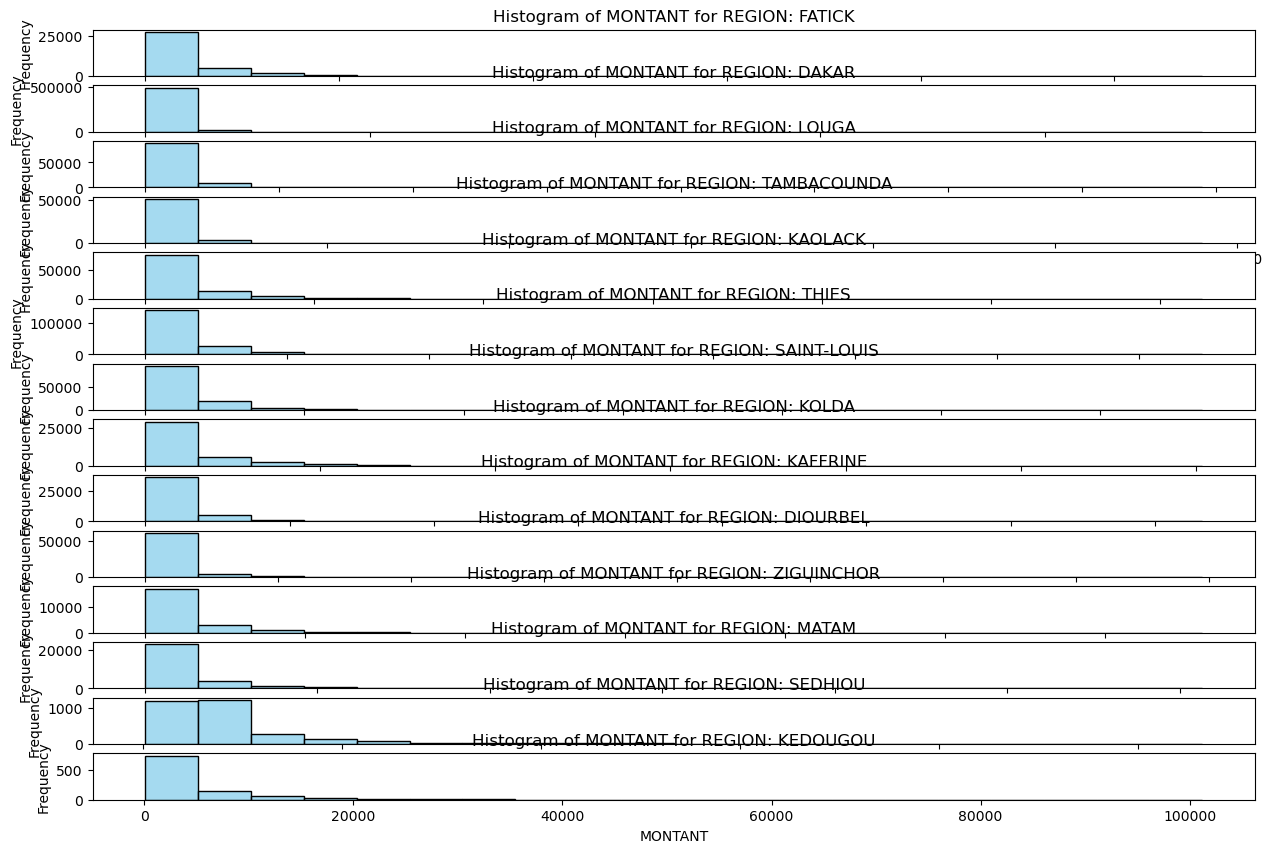

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for 'MONTANT' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['MONTANT'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of MONTANT for REGION: {region}')
    plt.xlabel('MONTANT')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

         REGION  Mode       Mean   Q2
0         DAKAR   1.0  14.405930  9.0
1      DIOURBEL   1.0   7.215765  4.0
2        FATICK   1.0   9.748546  6.0
3      KAFFRINE   1.0  10.433899  6.0
4       KAOLACK   1.0  11.364897  7.0
5      KEDOUGOU   1.0  10.337714  5.0
6         KOLDA   1.0  12.280561  7.0
7         LOUGA   1.0  10.195613  6.0
8         MATAM   1.0  10.727517  6.0
9   SAINT-LOUIS   1.0  13.980211  9.0
10      SEDHIOU   1.0   8.277571  4.0
11  TAMBACOUNDA   1.0  12.905911  8.0
12        THIES   1.0  11.787082  7.0
13   ZIGUINCHOR   1.0  10.303708  6.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\365469299.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


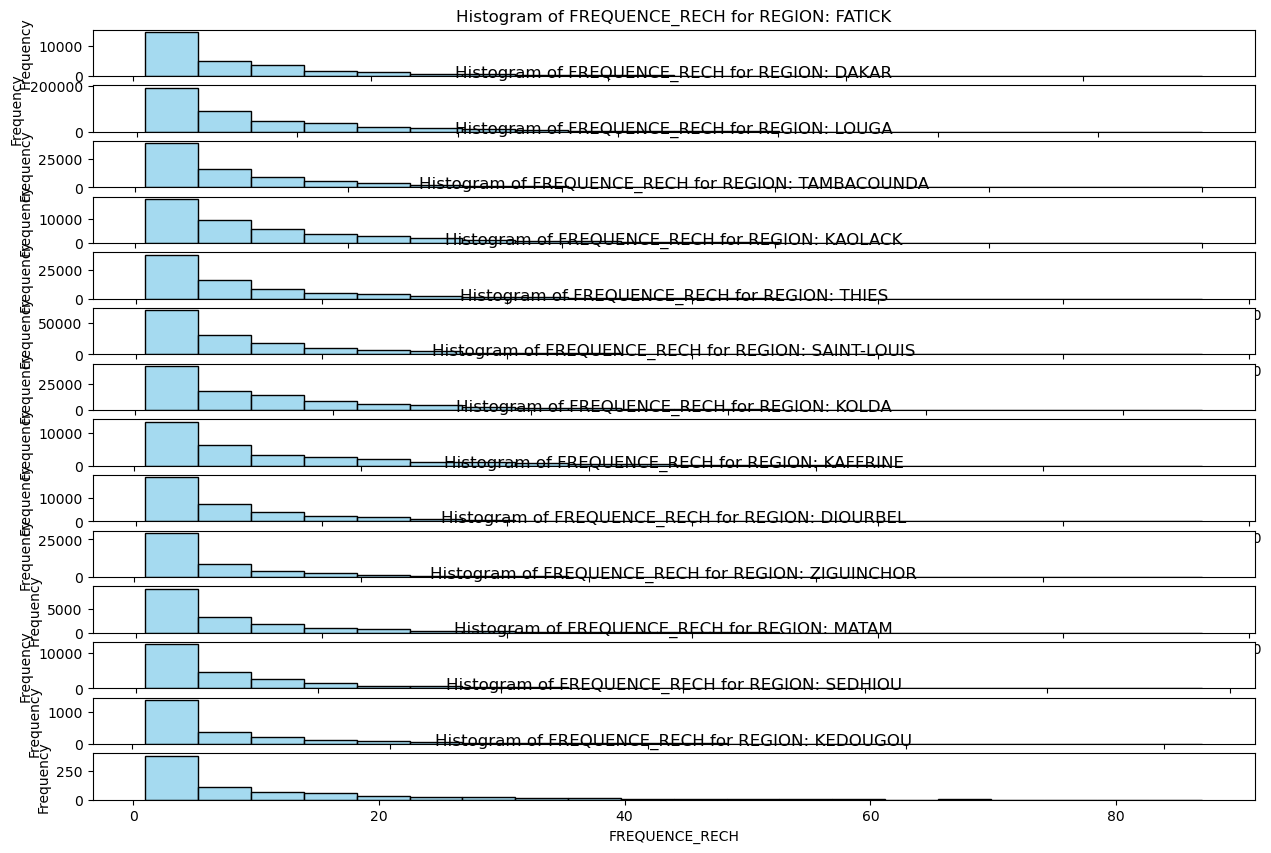

0


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'FREQUENCE_RECH' by 'REGION'
stats_frequence_rech = df.groupby('REGION')['FREQUENCE_RECH'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_frequence_rech)

# Plotting histograms for 'FREQUENCE_RECH' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['FREQUENCE_RECH'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of FREQUENCE_RECH for REGION: {region}')
    plt.xlabel('FREQUENCE_RECH')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_frequence_rech = df.groupby('REGION')['FREQUENCE_RECH'].median()

# Step 2: Define a function to replace missing values in FREQUENCE_RECH with the Q2 value of each REGION
def replace_na_with_q2_frequence_rech(row):
    if pd.isna(row['FREQUENCE_RECH']):
        return q2_values_frequence_rech.get(row['REGION'], row['FREQUENCE_RECH'])
    return row['FREQUENCE_RECH']

# Apply the function to replace missing values
df['FREQUENCE_RECH'] = df.apply(replace_na_with_q2_frequence_rech, axis=1)

# Verify that there are no missing values left in 'FREQUENCE_RECH'
print(df['FREQUENCE_RECH'].isna().sum())


         REGION   Mode         Mean      Q2
0         DAKAR  167.0  2449.000013  1567.0
1      DIOURBEL  167.0  1275.079512   700.0
2        FATICK  167.0  1516.324729   833.0
3      KAFFRINE  167.0  1614.703033   900.0
4       KAOLACK  167.0  1637.829156   933.0
5      KEDOUGOU  167.0  1930.457755  1033.0
6         KOLDA  167.0  1774.395477  1000.0
7         LOUGA  167.0  1592.994967   917.0
8         MATAM  167.0  1639.097545   907.0
9   SAINT-LOUIS  167.0  1994.827368  1250.0
10      SEDHIOU  167.0  1550.970281   888.0
11  TAMBACOUNDA  167.0  1903.952898  1167.0
12        THIES  167.0  1958.209824  1167.0
13   ZIGUINCHOR  167.0  1792.169391  1000.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\2496093054.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


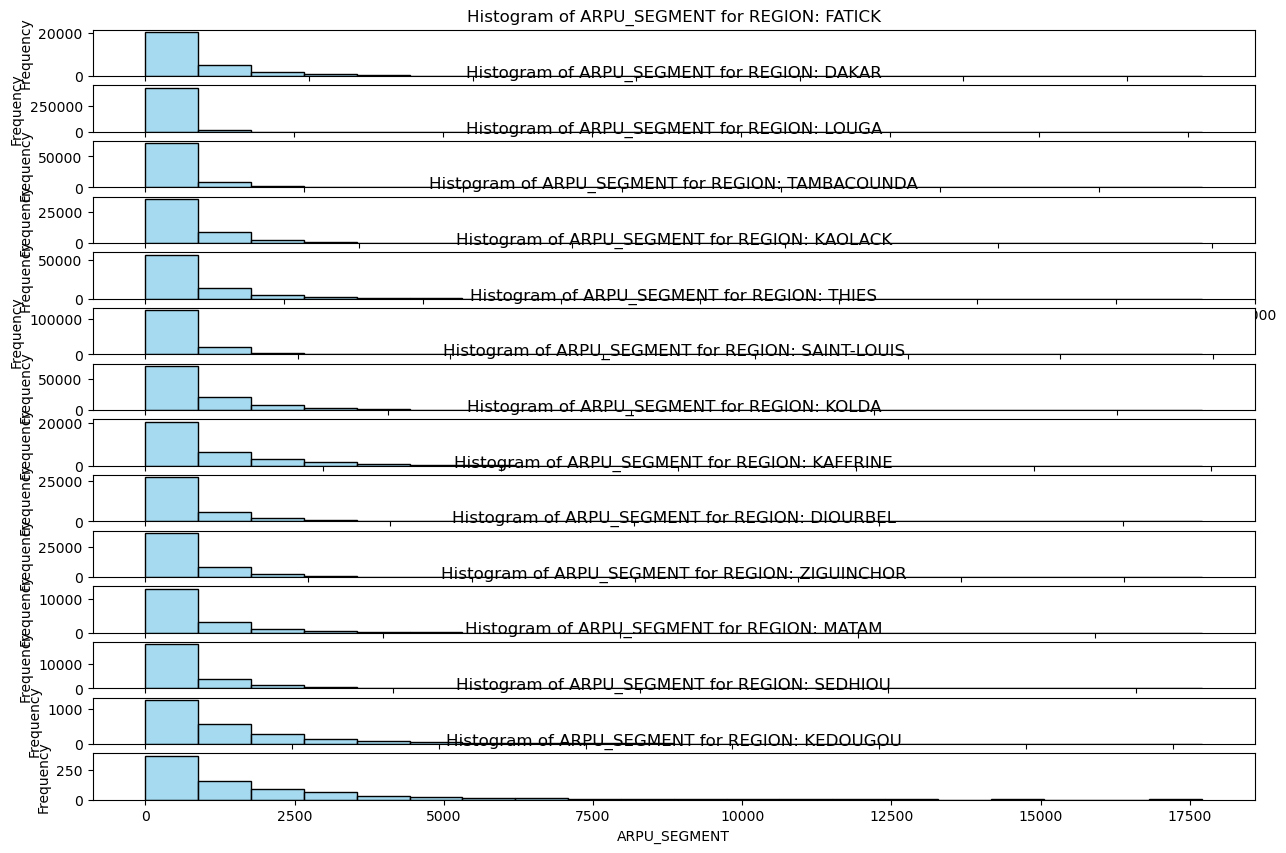

0


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'ARPU_SEGMENT' by 'REGION'
stats_arpu_segment = df.groupby('REGION')['ARPU_SEGMENT'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_arpu_segment)

# Plotting histograms for 'ARPU_SEGMENT' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['ARPU_SEGMENT'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of ARPU_SEGMENT for REGION: {region}')
    plt.xlabel('ARPU_SEGMENT')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_arpu_segment = df.groupby('REGION')['ARPU_SEGMENT'].median()

# Step 2: Define a function to replace missing values in ARPU_SEGMENT with the Q2 value of each REGION
def replace_na_with_q2_arpu_segment(row):
    if pd.isna(row['ARPU_SEGMENT']):
        return q2_values_arpu_segment.get(row['REGION'], row['ARPU_SEGMENT'])
    return row['ARPU_SEGMENT']

# Apply the function to replace missing values
df['ARPU_SEGMENT'] = df.apply(replace_na_with_q2_arpu_segment, axis=1)

# Verify that there are no missing values left in 'ARPU_SEGMENT'
print(df['ARPU_SEGMENT'].isna().sum())


         REGION  Mode       Mean    Q2
0         DAKAR   1.0  17.611069  12.0
1      DIOURBEL   1.0   9.322076   6.0
2        FATICK   1.0  11.989947   8.0
3      KAFFRINE   1.0  12.409382   8.0
4       KAOLACK   1.0  13.857257   9.0
5      KEDOUGOU   1.0  12.578815   7.0
6         KOLDA   1.0  14.604851  10.0
7         LOUGA   1.0  12.331502   8.0
8         MATAM   1.0  13.386920   9.0
9   SAINT-LOUIS   1.0  16.561987  12.0
10      SEDHIOU   1.0  10.558233   6.5
11  TAMBACOUNDA   1.0  15.482663  11.0
12        THIES   1.0  14.422908  10.0
13   ZIGUINCHOR   1.0  13.292113   8.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\3539185500.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


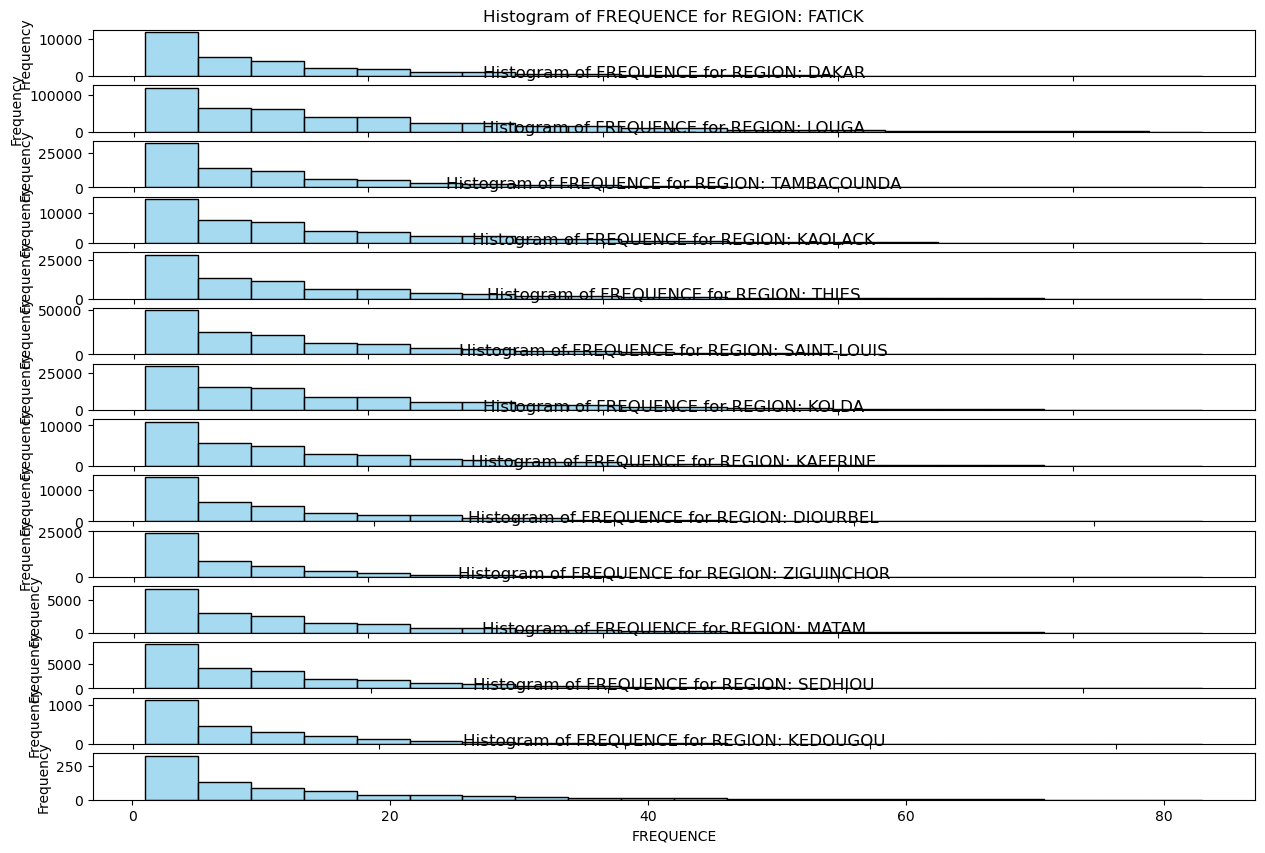

0


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'FREQUENCE' by 'REGION'
stats_frequence = df.groupby('REGION')['FREQUENCE'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_frequence)

# Plotting histograms for 'FREQUENCE' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['FREQUENCE'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of FREQUENCE for REGION: {region}')
    plt.xlabel('FREQUENCE')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_frequence = df.groupby('REGION')['FREQUENCE'].median()

# Step 2: Define a function to replace missing values in FREQUENCE with the Q2 value of each REGION
def replace_na_with_q2_frequence(row):
    if pd.isna(row['FREQUENCE']):
        return q2_values_frequence.get(row['REGION'], row['FREQUENCE'])
    return row['FREQUENCE']

# Apply the function to replace missing values
df['FREQUENCE'] = df.apply(replace_na_with_q2_frequence, axis=1)

# Verify that there are no missing values left in 'FREQUENCE'
print(df['FREQUENCE'].isna().sum())


         REGION  Mode         Mean      Q2
0         DAKAR   0.0  5472.724140  1330.0
1      DIOURBEL   0.0  3257.777904   765.0
2        FATICK   0.0  1144.018085     1.0
3      KAFFRINE   0.0   514.768190     0.0
4       KAOLACK   0.0  2222.325476    64.0
5      KEDOUGOU   0.0  1339.585859     6.0
6         KOLDA   0.0   605.949019     0.0
7         LOUGA   0.0  1321.225784     3.0
8         MATAM   0.0  1644.764132    87.0
9   SAINT-LOUIS   0.0  2253.117920   124.0
10      SEDHIOU   0.0  1922.175339   293.5
11  TAMBACOUNDA   0.0  1157.261558    19.0
12        THIES   0.0  3011.954713   313.5
13   ZIGUINCHOR   0.0  2915.205239   126.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\3693071546.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


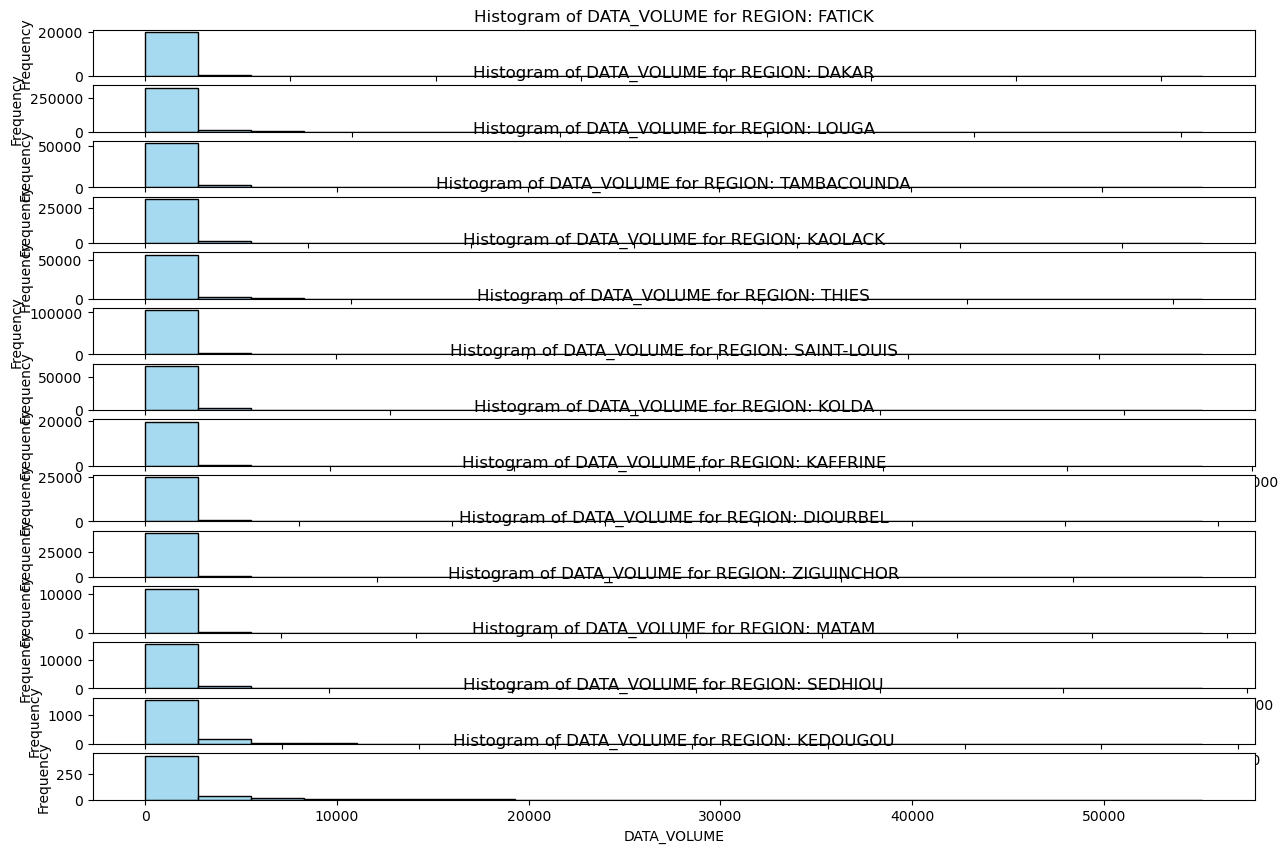

0


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'DATA_VOLUME' by 'REGION'
stats_data_volume = df.groupby('REGION')['DATA_VOLUME'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_data_volume)

# Plotting histograms for 'DATA_VOLUME' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['DATA_VOLUME'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of DATA_VOLUME for REGION: {region}')
    plt.xlabel('DATA_VOLUME')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_data_volume = df.groupby('REGION')['DATA_VOLUME'].median()

# Step 2: Define a function to replace missing values in DATA_VOLUME with the Q2 value of each REGION
def replace_na_with_q2_data_volume(row):
    if pd.isna(row['DATA_VOLUME']):
        return q2_values_data_volume.get(row['REGION'], row['DATA_VOLUME'])
    return row['DATA_VOLUME']

# Apply the function to replace missing values
df['DATA_VOLUME'] = df.apply(replace_na_with_q2_data_volume, axis=1)

# Verify that there are no missing values left in 'DATA_VOLUME'
print(df['DATA_VOLUME'].isna().sum())


         REGION  Mode        Mean    Q2
0         DAKAR   0.0  252.553421  26.0
1      DIOURBEL   0.0  166.163291   8.0
2        FATICK   0.0  369.736082  59.0
3      KAFFRINE   0.0  344.439322  65.0
4       KAOLACK   0.0  399.389934  56.0
5      KEDOUGOU   0.0  346.275908  41.0
6         KOLDA   0.0  411.299477  81.0
7         LOUGA   0.0  389.750867  51.0
8         MATAM   0.0  337.506321  29.0
9   SAINT-LOUIS   1.0  393.880024  54.0
10      SEDHIOU   0.0  193.634384  18.5
11  TAMBACOUNDA   0.0  379.641445  68.0
12        THIES   0.0  329.305694  37.0
13   ZIGUINCHOR   0.0  215.221324  21.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\608867031.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


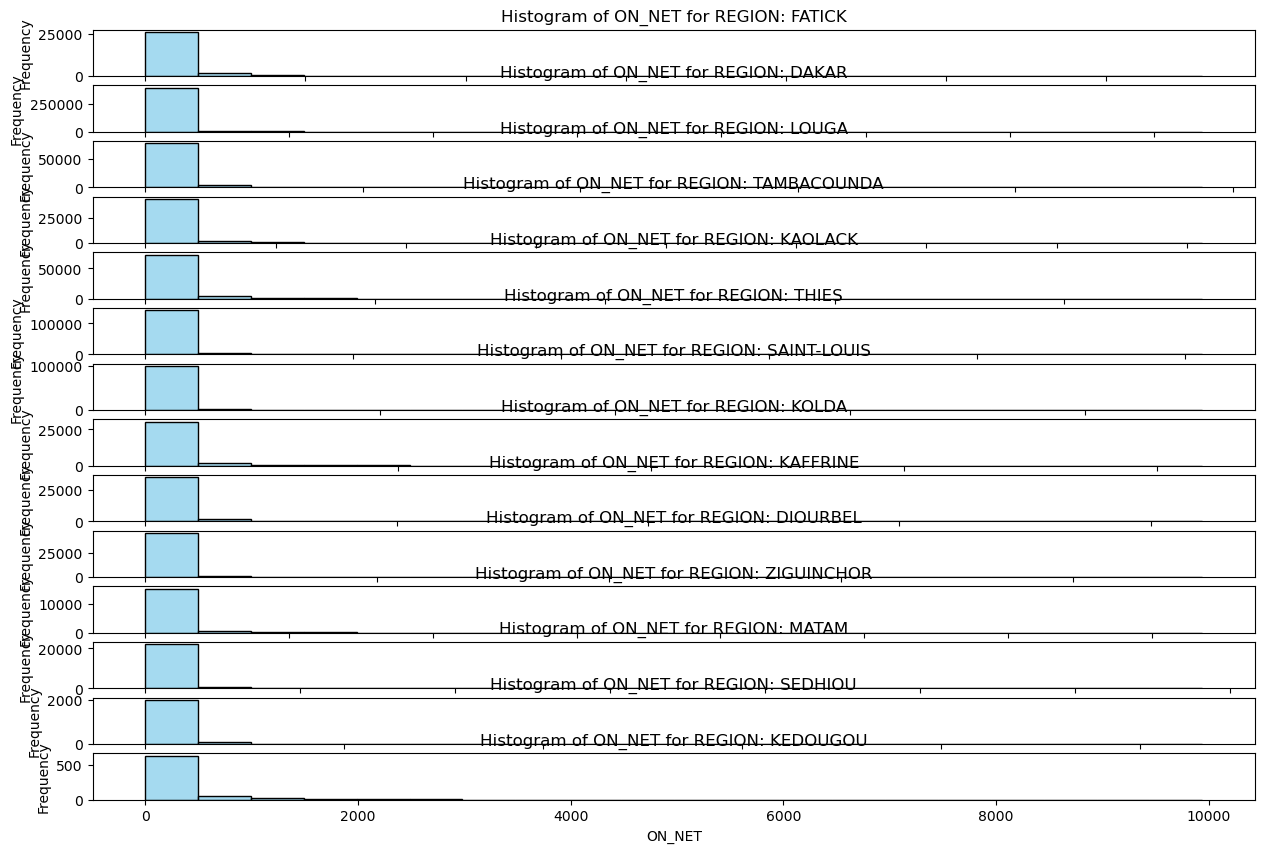

0


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'ON_NET' by 'REGION'
stats_on_net = df.groupby('REGION')['ON_NET'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_on_net)

# Plotting histograms for 'ON_NET' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['ON_NET'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of ON_NET for REGION: {region}')
    plt.xlabel('ON_NET')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_on_net = df.groupby('REGION')['ON_NET'].median()

# Step 2: Define a function to replace missing values in ON_NET with the Q2 value of each REGION
def replace_na_with_q2_on_net(row):
    if pd.isna(row['ON_NET']):
        return q2_values_on_net.get(row['REGION'], row['ON_NET'])
    return row['ON_NET']

# Apply the function to replace missing values
df['ON_NET'] = df.apply(replace_na_with_q2_on_net, axis=1)

# Verify that there are no missing values left in 'ON_NET'
print(df['ON_NET'].isna().sum())


         REGION  Mode        Mean    Q2
0         DAKAR   1.0  121.900325  39.0
1      DIOURBEL   0.0   53.193524  13.0
2        FATICK   1.0   86.440724  31.0
3      KAFFRINE   1.0  107.669044  47.0
4       KAOLACK   1.0   88.058591  30.0
5      KEDOUGOU   0.0  147.544000  47.0
6         KOLDA   1.0  110.241632  45.0
7         LOUGA   1.0   86.003866  31.0
8         MATAM   1.0   97.549073  29.0
9   SAINT-LOUIS   1.0   99.998744  35.0
10      SEDHIOU   0.0  107.925500  34.0
11  TAMBACOUNDA   1.0  111.988759  45.0
12        THIES   1.0   94.199359  30.0
13   ZIGUINCHOR   1.0  106.464909  32.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\53488464.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


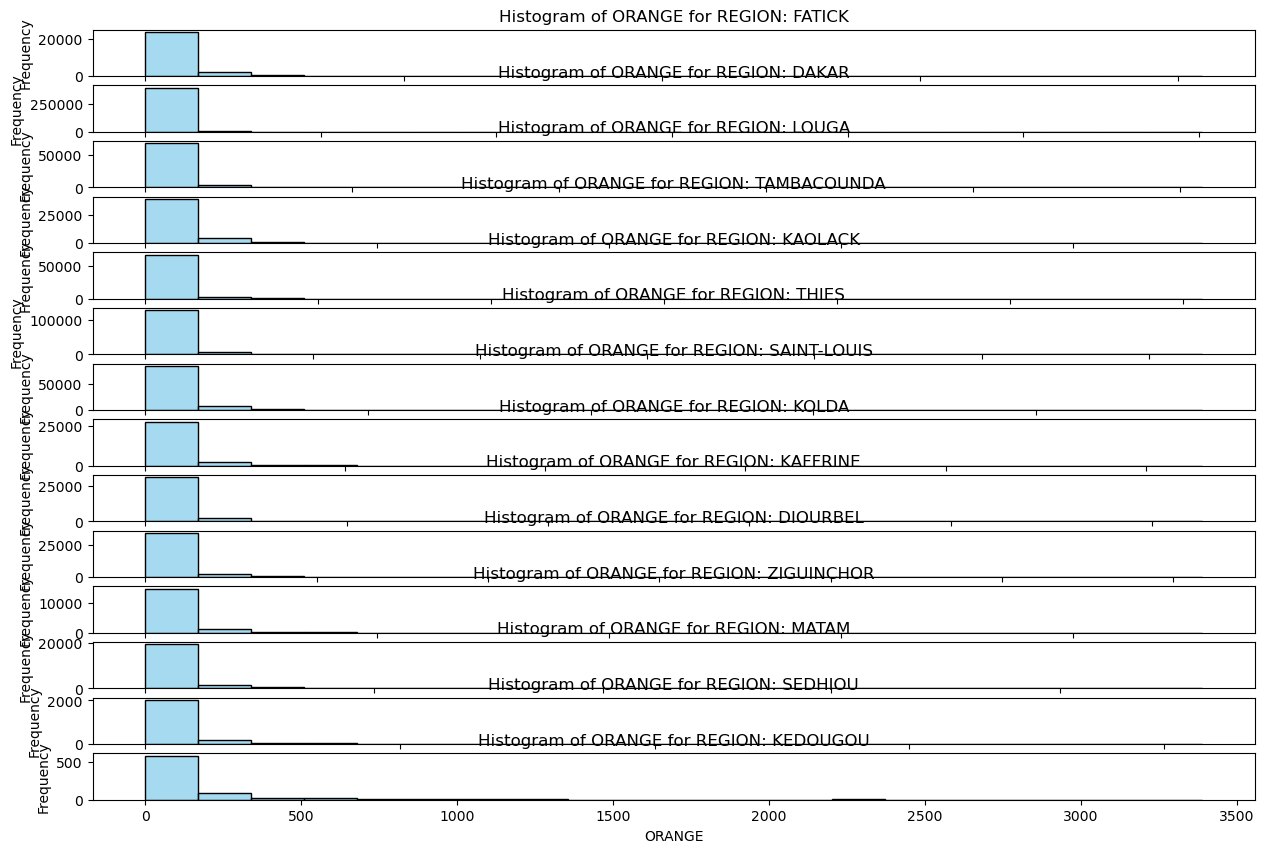

0


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'ORANGE' by 'REGION'
stats_orange = df.groupby('REGION')['ORANGE'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_orange)

# Plotting histograms for 'ORANGE' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['ORANGE'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of ORANGE for REGION: {region}')
    plt.xlabel('ORANGE')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_orange = df.groupby('REGION')['ORANGE'].median()

# Step 2: Define a function to replace missing values in ORANGE with the Q2 value of each REGION
def replace_na_with_q2_orange(row):
    if pd.isna(row['ORANGE']):
        return q2_values_orange.get(row['REGION'], row['ORANGE'])
    return row['ORANGE']

# Apply the function to replace missing values
df['ORANGE'] = df.apply(replace_na_with_q2_orange, axis=1)

# Verify that there are no missing values left in 'ORANGE'
print(df['ORANGE'].isna().sum())


         REGION  Mode       Mean    Q2
0         DAKAR   1.0  26.589621   7.0
1      DIOURBEL   0.0  27.374344   9.0
2        FATICK   1.0  20.021786   7.0
3      KAFFRINE   1.0  14.580295   5.0
4       KAOLACK   1.0  22.340066   7.0
5      KEDOUGOU   1.0  24.026667   4.0
6         KOLDA   1.0  11.015495   3.0
7         LOUGA   1.0  21.993996   7.0
8         MATAM   1.0  19.565606   3.0
9   SAINT-LOUIS   1.0  16.217884   4.0
10      SEDHIOU   1.0  13.082322   4.0
11  TAMBACOUNDA   1.0  12.387729   3.0
12        THIES   1.0  31.410138  10.0
13   ZIGUINCHOR   1.0  18.809635   5.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\490140165.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


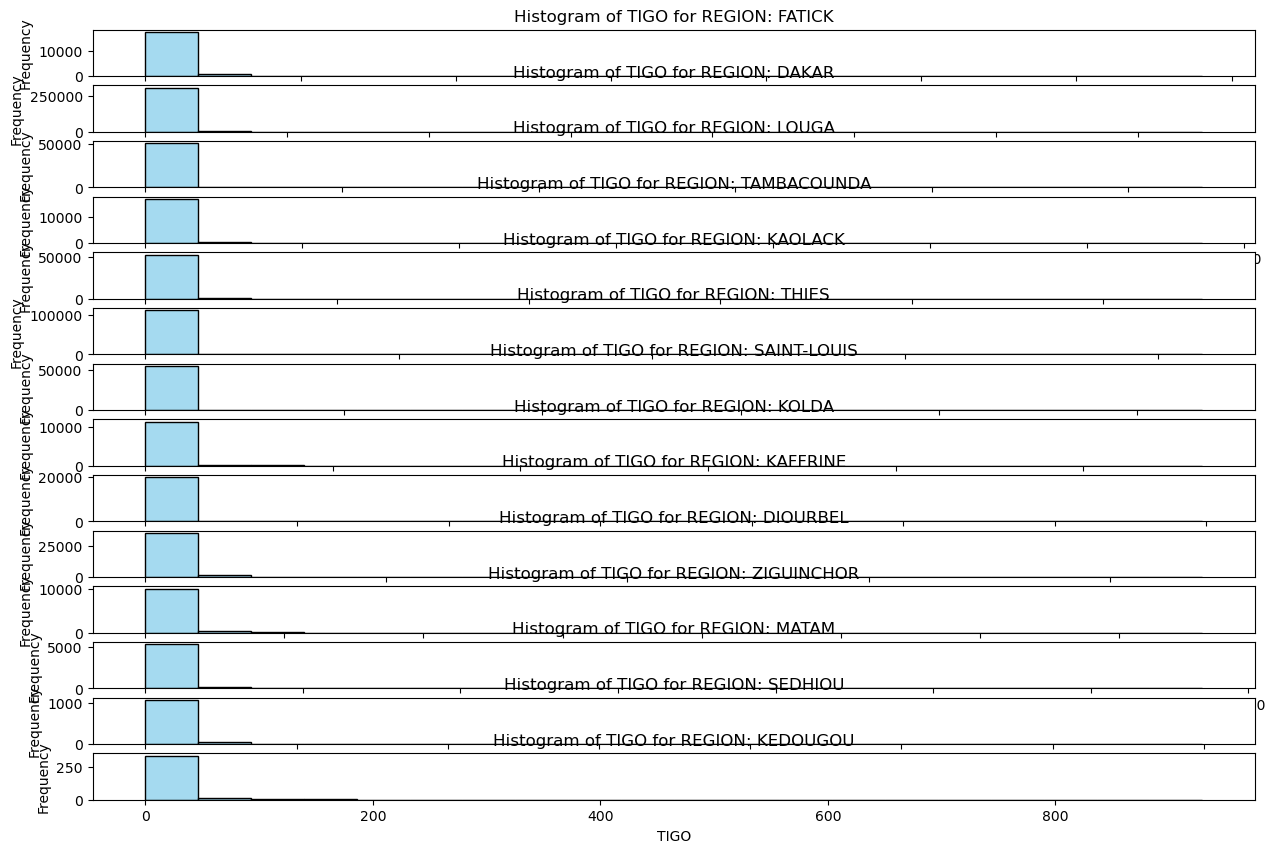

0


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'TIGO' by 'REGION'
stats_tigo = df.groupby('REGION')['TIGO'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_tigo)

# Plotting histograms for 'TIGO' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['TIGO'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of TIGO for REGION: {region}')
    plt.xlabel('TIGO')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_tigo = df.groupby('REGION')['TIGO'].median()

# Step 2: Define a function to replace missing values in TIGO with the Q2 value of each REGION
def replace_na_with_q2_tigo(row):
    if pd.isna(row['TIGO']):
        return q2_values_tigo.get(row['REGION'], row['TIGO'])
    return row['TIGO']

# Apply the function to replace missing values
df['TIGO'] = df.apply(replace_na_with_q2_tigo, axis=1)

# Verify that there are no missing values left in 'TIGO'
print(df['TIGO'].isna().sum())


         REGION  Mode       Mean    Q2
0         DAKAR    62  37.794923  42.0
1      DIOURBEL    62  30.444097  29.0
2        FATICK    62  37.898073  42.0
3      KAFFRINE    62  38.661352  42.0
4       KAOLACK    62  37.681531  42.0
5      KEDOUGOU    62  28.742157  26.0
6         KOLDA    62  40.116744  45.0
7         LOUGA    62  38.598195  42.0
8         MATAM    62  35.050064  36.0
9   SAINT-LOUIS    62  39.258412  44.0
10      SEDHIOU    62  30.205835  28.0
11  TAMBACOUNDA    62  39.650870  44.0
12        THIES    62  37.920317  42.0
13   ZIGUINCHOR    62  32.734928  32.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\935427057.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


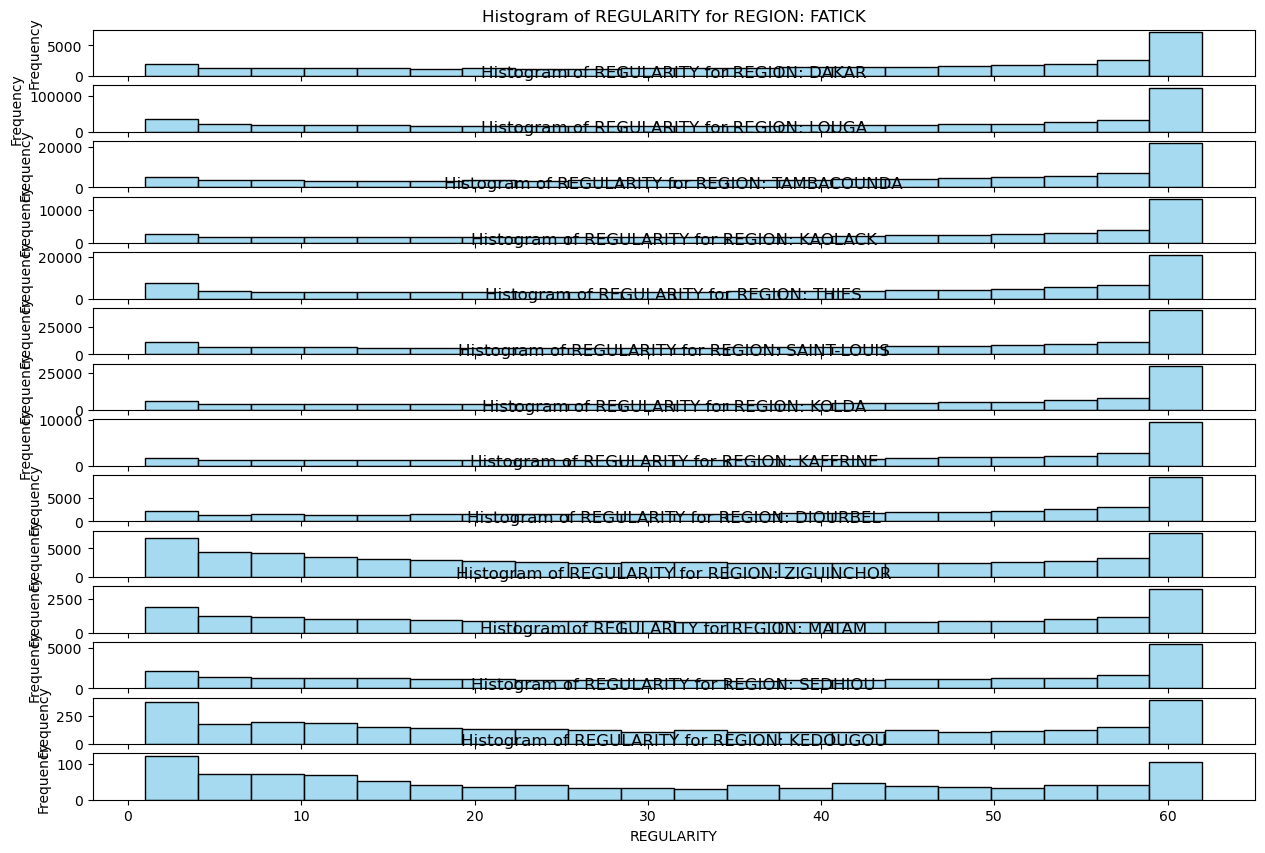

0


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'REGULARITY' by 'REGION'
stats_regular = df.groupby('REGION')['REGULARITY'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_regular)

# Plotting histograms for 'REGULARITY' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['REGULARITY'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of REGULARITY for REGION: {region}')
    plt.xlabel('REGULARITY')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_regular = df.groupby('REGION')['REGULARITY'].median()

# Step 2: Define a function to replace missing values in REGULARITY with the Q2 value of each REGION
def replace_na_with_q2_regular(row):
    if pd.isna(row['REGULARITY']):
        return q2_values_regular.get(row['REGION'], row['REGULARITY'])
    return row['REGULARITY']

# Apply the function to replace missing values
df['REGULARITY'] = df.apply(replace_na_with_q2_regular, axis=1)

# Verify that there are no missing values left in 'REGULARITY'
print(df['REGULARITY'].isna().sum())


         REGION  Mode       Mean    Q2
0         DAKAR    62  37.794923  42.0
1      DIOURBEL    62  30.444097  29.0
2        FATICK    62  37.898073  42.0
3      KAFFRINE    62  38.661352  42.0
4       KAOLACK    62  37.681531  42.0
5      KEDOUGOU    62  28.742157  26.0
6         KOLDA    62  40.116744  45.0
7         LOUGA    62  38.598195  42.0
8         MATAM    62  35.050064  36.0
9   SAINT-LOUIS    62  39.258412  44.0
10      SEDHIOU    62  30.205835  28.0
11  TAMBACOUNDA    62  39.650870  44.0
12        THIES    62  37.920317  42.0
13   ZIGUINCHOR    62  32.734928  32.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\935427057.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


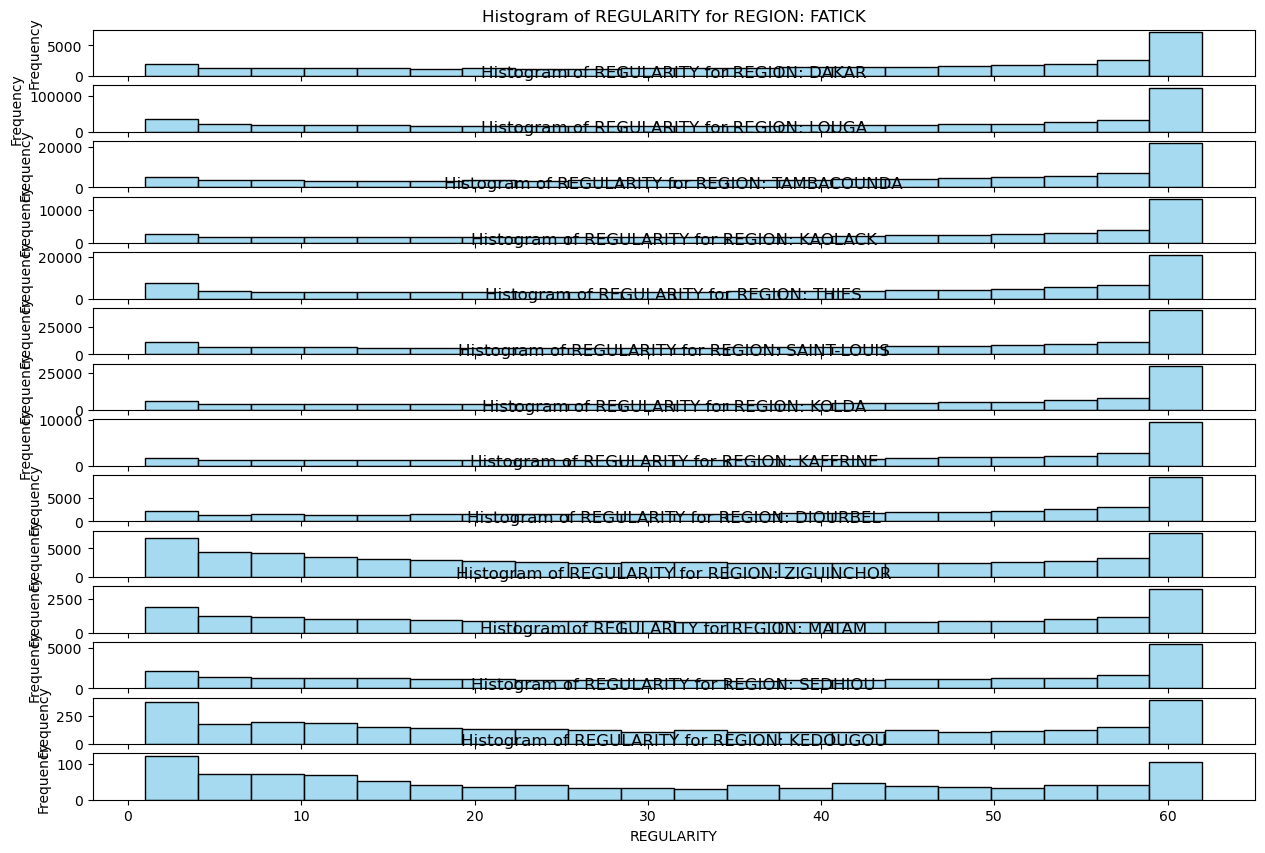

0


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'REGULARITY' by 'REGION'
stats_regular = df.groupby('REGION')['REGULARITY'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_regular)

# Plotting histograms for 'REGULARITY' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['REGULARITY'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of REGULARITY for REGION: {region}')
    plt.xlabel('REGULARITY')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_regular = df.groupby('REGION')['REGULARITY'].median()

# Step 2: Define a function to replace missing values in REGULARITY with the Q2 value of each REGION
def replace_na_with_q2_regular(row):
    if pd.isna(row['REGULARITY']):
        return q2_values_regular.get(row['REGION'], row['REGULARITY'])
    return row['REGULARITY']

# Apply the function to replace missing values
df['REGULARITY'] = df.apply(replace_na_with_q2_regular, axis=1)

# Verify that there are no missing values left in 'REGULARITY'
print(df['REGULARITY'].isna().sum())


         REGION  Mode       Mean   Q2
0         DAKAR   1.0  11.371454  6.0
1      DIOURBEL   1.0   6.081658  3.0
2        FATICK   1.0   7.793467  4.0
3      KAFFRINE   1.0   8.473223  5.0
4       KAOLACK   1.0   8.767199  5.0
5      KEDOUGOU   1.0   9.286733  4.0
6         KOLDA   1.0   9.702336  5.0
7         LOUGA   1.0   8.070124  4.0
8         MATAM   1.0   8.958635  4.0
9   SAINT-LOUIS   1.0  10.816299  6.0
10      SEDHIOU   1.0   7.149977  3.0
11  TAMBACOUNDA   1.0  10.055313  6.0
12        THIES   1.0   9.423678  5.0
13   ZIGUINCHOR   1.0   8.970689  4.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\3427716182.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


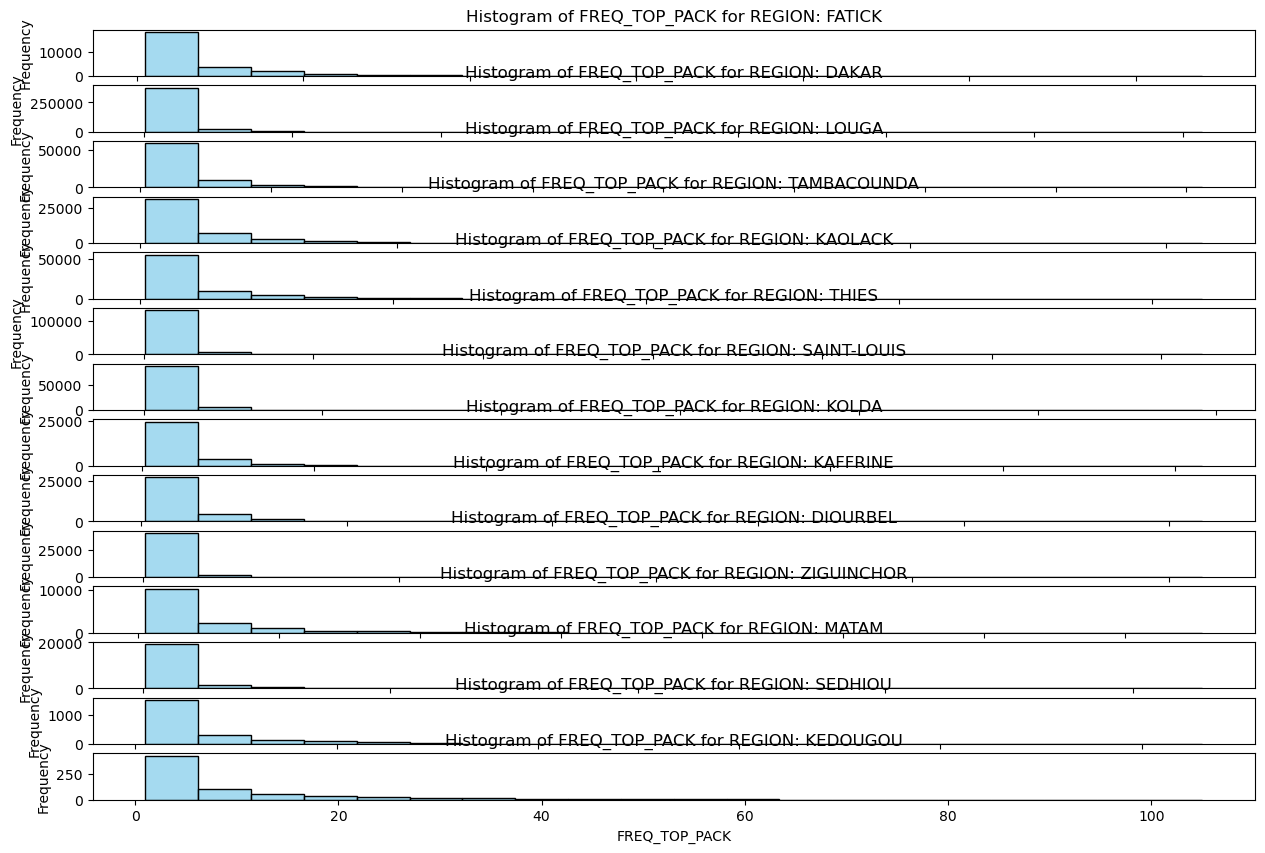

0


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'FREQ_TOP_PACK' by 'REGION'
stats_freq_top_pack = df.groupby('REGION')['FREQ_TOP_PACK'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_freq_top_pack)

# Plotting histograms for 'FREQ_TOP_PACK' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['FREQ_TOP_PACK'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of FREQ_TOP_PACK for REGION: {region}')
    plt.xlabel('FREQ_TOP_PACK')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_freq_top_pack = df.groupby('REGION')['FREQ_TOP_PACK'].median()

# Step 2: Define a function to replace missing values in FREQ_TOP_PACK with the Q2 value of each REGION
def replace_na_with_q2_freq_top_pack(row):
    if pd.isna(row['FREQ_TOP_PACK']):
        return q2_values_freq_top_pack.get(row['REGION'], row['FREQ_TOP_PACK'])
    return row['FREQ_TOP_PACK']

# Apply the function to replace missing values
df['FREQ_TOP_PACK'] = df.apply(replace_na_with_q2_freq_top_pack, axis=1)

# Verify that there are no missing values left in 'FREQ_TOP_PACK'
print(df['FREQ_TOP_PACK'].isna().sum())


         REGION  Mode       Mean   Q2
0         DAKAR   6.0  10.193225  6.0
1      DIOURBEL   3.0   4.975161  3.0
2        FATICK   4.0   6.857419  4.0
3      KAFFRINE   5.0   7.684849  5.0
4       KAOLACK   5.0   7.835945  5.0
5      KEDOUGOU   4.0   7.633333  4.0
6         KOLDA   5.0   8.668121  5.0
7         LOUGA   4.0   7.118512  4.0
8         MATAM   4.0   7.631297  4.0
9   SAINT-LOUIS   6.0   9.857948  6.0
10      SEDHIOU   3.0   5.936518  3.0
11  TAMBACOUNDA   6.0   9.244162  6.0
12        THIES   5.0   8.382006  5.0
13   ZIGUINCHOR   4.0   7.423422  4.0


C:\Users\ezer2\AppData\Local\Temp\ipykernel_8200\3427716182.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


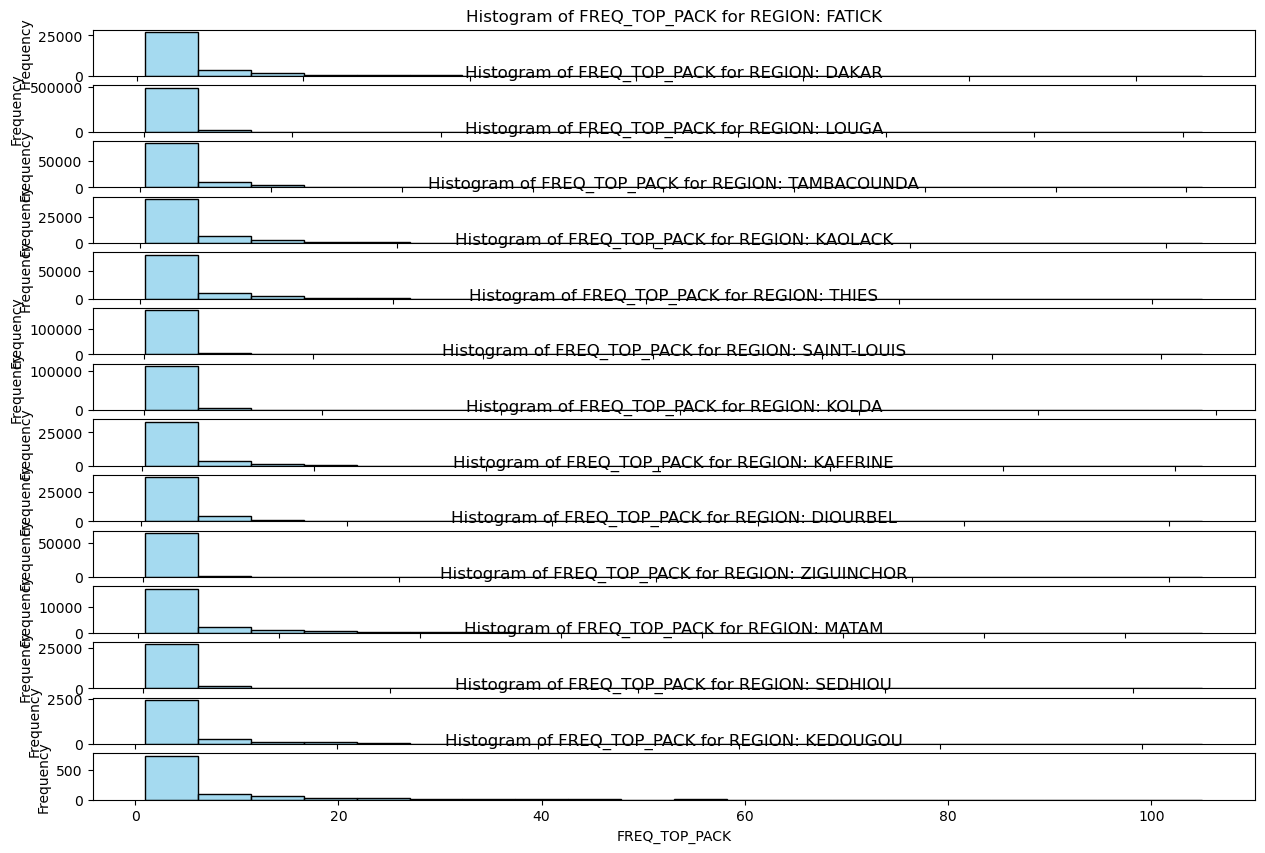

0


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named df

# Calculate statistics for 'FREQ_TOP_PACK' by 'REGION'
stats_freq_top_pack = df.groupby('REGION')['FREQ_TOP_PACK'].agg(
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Mean='mean',
    Q2='median'
).reset_index()

# Display the resulting DataFrame
print(stats_freq_top_pack)

# Plotting histograms for 'FREQ_TOP_PACK' for each 'REGION'
regions = df['REGION'].unique()

plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    sns.histplot(df[df['REGION'] == region]['FREQ_TOP_PACK'].dropna(), bins=20, color='skyblue', kde=False)
    plt.title(f'Histogram of FREQ_TOP_PACK for REGION: {region}')
    plt.xlabel('FREQ_TOP_PACK')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 1: Calculate the Q2 (median) for each REGION
q2_values_freq_top_pack = df.groupby('REGION')['FREQ_TOP_PACK'].median()

# Step 2: Define a function to replace missing values in FREQ_TOP_PACK with the Q2 value of each REGION
def replace_na_with_q2_freq_top_pack(row):
    if pd.isna(row['FREQ_TOP_PACK']):
        return q2_values_freq_top_pack.get(row['REGION'], row['FREQ_TOP_PACK'])
    return row['FREQ_TOP_PACK']

# Apply the function to replace missing values
df['FREQ_TOP_PACK'] = df.apply(replace_na_with_q2_freq_top_pack, axis=1)

# Verify that there are no missing values left in 'FREQ_TOP_PACK'
print(df['FREQ_TOP_PACK'].isna().sum())


In [34]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
user_id            0.000000
REGION             0.000000
TENURE             0.000000
MONTANT            0.000000
FREQUENCE_RECH     0.000000
REVENUE           15.086503
ARPU_SEGMENT       0.000000
FREQUENCE          0.000000
DATA_VOLUME        0.000000
ON_NET             0.000000
ORANGE             0.000000
TIGO               0.000000
ZONE1             89.627277
ZONE2             92.122853
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          23.311457
FREQ_TOP_PACK      0.000000
CHURN              0.000000
dtype: float64


In [35]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named df

# Define the columns to be dropped
columns_to_drop = ['REVENUE', 'ZONE1', 'ZONE2', 'TOP_PACK']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame to verify columns have been dropped
print("Cleaned DataFrame:")
print(df.info())


Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1304749 entries, 0 to 2154046
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1304749 non-null  object 
 1   REGION          1304749 non-null  object 
 2   TENURE          1304749 non-null  object 
 3   MONTANT         1304749 non-null  float64
 4   FREQUENCE_RECH  1304749 non-null  float64
 5   ARPU_SEGMENT    1304749 non-null  float64
 6   FREQUENCE       1304749 non-null  float64
 7   DATA_VOLUME     1304749 non-null  float64
 8   ON_NET          1304749 non-null  float64
 9   ORANGE          1304749 non-null  float64
 10  TIGO            1304749 non-null  float64
 11  MRG             1304749 non-null  object 
 12  REGULARITY      1304749 non-null  int64  
 13  FREQ_TOP_PACK   1304749 non-null  float64
 14  CHURN           1304749 non-null  int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 159.3+ MB
None


In [36]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
user_id           0.0
REGION            0.0
TENURE            0.0
MONTANT           0.0
FREQUENCE_RECH    0.0
ARPU_SEGMENT      0.0
FREQUENCE         0.0
DATA_VOLUME       0.0
ON_NET            0.0
ORANGE            0.0
TIGO              0.0
MRG               0.0
REGULARITY        0.0
FREQ_TOP_PACK     0.0
CHURN             0.0
dtype: float64


In [37]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,1417.0,17.0,4.0,388.0,46.0,1.0,NO,54,8.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NO,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,328.0,1.0,1330.0,39.0,24.0,7.0,NO,11,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,3000.0,18.0,3.0,252.0,70.0,91.0,NO,62,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,2800.0,6.0,917.0,8.0,3.0,51.0,31.0,7.0,NO,2,4.0,0


In [38]:
df['CHURN'].value_counts()

CHURN
0    1281238
1      23511
Name: count, dtype: int64

In [39]:
import pandas  as pd
from sklearn.preprocessing import LabelEncoder

In [40]:
# Initialize LabelEncoder
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['REGION', 'TENURE', 'MRG']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,2,7,4250.0,15.0,1417.0,17.0,4.0,388.0,46.0,1.0,0,54,8.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,0,7,13500.0,15.0,4501.0,18.0,43804.0,41.0,102.0,2.0,0,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,0,7,1000.0,1.0,328.0,1.0,1330.0,39.0,24.0,7.0,0,11,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,7,7,8500.0,17.0,3000.0,18.0,3.0,252.0,70.0,91.0,0,62,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,7,7,2800.0,6.0,917.0,8.0,3.0,51.0,31.0,7.0,0,2,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154039,ffffc38e1c3cb77a88941e739c358fd96bce3238,0,7,4700.0,9.0,1567.0,12.0,1330.0,26.0,25.0,7.0,0,6,6.0,0
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,9,7,2000.0,4.0,666.0,5.0,0.0,57.0,1.0,4.0,0,21,2.0,0
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,0,7,4800.0,4.0,1600.0,14.0,7400.0,2.0,12.0,7.0,0,62,3.0,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,12,7,6100.0,15.0,1933.0,15.0,621.0,26.0,40.0,40.0,0,55,9.0,0


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [42]:
# Drop the 'user_id' column as it is not useful for training
df = df.drop(columns=['user_id'])

# Define features and target
# Define features (X) and target (y)
# Define features (X) by selecting five specific columns
selected_columns = ['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ARPU_SEGMENT']  # Choose your five columns here
X = df[selected_columns]  # Select only the specified columns
y = df['CHURN']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9817129718336847
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    384270
           1       0.00      0.00      0.00      7155

    accuracy                           0.98    391425
   macro avg       0.49      0.50      0.50    391425
weighted avg       0.96      0.98      0.97    391425



In [43]:
X.columns

Index(['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ARPU_SEGMENT'], dtype='object')

In [44]:
print(X.dtypes)


TENURE              int32
MONTANT           float64
FREQUENCE_RECH    float64
DATA_VOLUME       float64
ARPU_SEGMENT      float64
dtype: object


In [45]:
import pickle

In [46]:
# Save the trained model to a .pkl file
with open('churn.pkl', 'wb') as file:
    pickle.dump(model, file)